# Antenna Array Example
The codes build a linear antenna array based on the input parameters and calculate/visulize the array radiation pattern. It can calculaet some array pattern performance parameters such as Gain, Side Lobe Level (SLL) and Half Power Beam Widrg (HPBW). 

## Array Geometry 


In [1]:
#center the figures
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

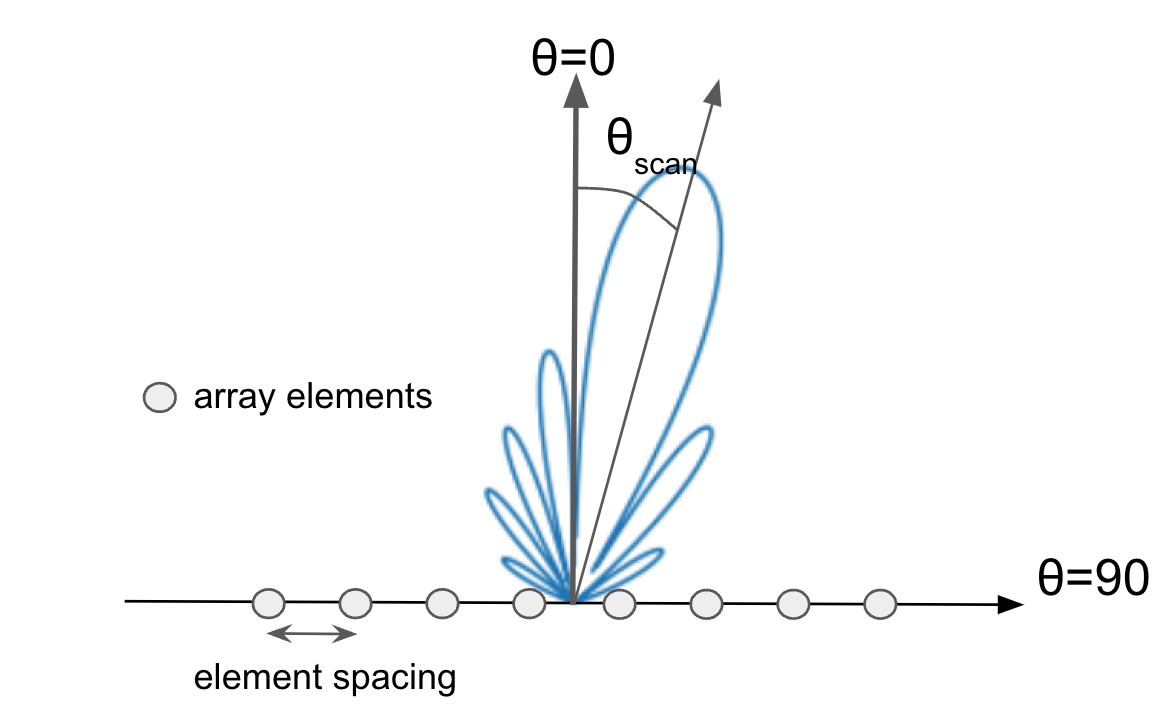

In [2]:
from IPython.display import Image
Image("img/array_geo.png",width = 600, height = 300)

# antenna_array module
 you can import the basic functions for antenna array calculation 
 - **calc_AF**: calculate array factor (AF) for a regulare equispaced linear antenna array
 - **calc_AF_**: calculate array factor (AF) for a general linear antenna array where elements are not equi-spaced
 - **polar_pattern** and **plot_pattern**: draw antenna array pattern in cart or polar coordinates

Peak = 10.8dBi, theta_peak = 30.0deg, SLL = 12.4dB, HPBW = 7.0deg


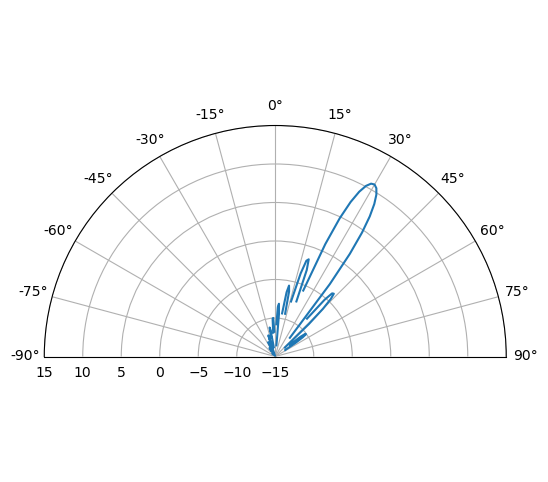

In [3]:

# This script show how to use the methods for antenna_array module to calculate the pattern 
# and parameters for a uniform linear array of 8 elements with scan angle = 30


from antenna_array import calc_AF, calc_AF_, plot_pattern, polar_pattern ,calc_peak_sll_hpbw, db20
import numpy as np
import matplotlib.pyplot as plt
import random

num_elem = 16 # number of elements
element_spacing = 0.5 
scan_angle = 30
theta_deg,AF_linear = calc_AF(num_elem,element_spacing,scan_angle)
G = db20(AF_linear)
peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg) 
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'
      .format(peak, theta_peak, SLL, HPBW))
polar_pattern(theta_deg,G);


Peak = 10.8dBi, theta_peak = 30.0deg, SLL = 8.5dB, HPBW = 6.0deg


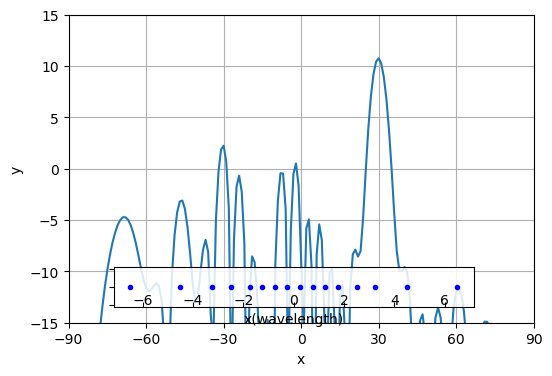

In [4]:
# An array of num_elem element with random element spacing choosen from element spacing list
num_elem = 16
dx = sorted(random.choices([0.5,0.75,1.25,2],k=int(num_elem/2),weights = [1, .75, 0.5, 0.5]))
element_spacing = np.hstack((np.flip(dx),dx[1:])) 
X = np.insert(np.cumsum(element_spacing),0,0)
X = X - np.mean(X)
P = -2 * np.pi * X * np.sin(np.radians(scan_angle))
I = np.ones(X.shape)
Nt = 181 # length of theta vectoe
theta_deg,dtheta_deg = np.linspace(-90,90,Nt,retstep = True)
theta_deg = theta_deg.reshape(Nt,1)
AF_linear = calc_AF_(X,I,P,theta_deg)
G = db20(AF_linear)
peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg) 
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.
      format(peak, theta_peak, SLL, HPBW))
fig, ax = plot_pattern(theta_deg,G);
ax.set_xticks(np.linspace(-90,90,7));
## plotting the array geometry in the inset
ax_inset = fig.add_axes([0.2, 0.15, 0.6, 0.1])
ax_inset.plot(X,np.zeros(X.shape),'.b')
ax_inset.patch.set_alpha(0.85)
ax_inset.set_yticklabels('');
ax_inset.tick_params(axis="x",direction="in", pad=-10)
ax_inset.set_yticklabels('');
ax_inset.set_xlabel('x(wavelength)');

# LinearArray Class

The class provides methods to analyze a linear antenna array. The class provides more felxibility to deal with both methods, data and visulaization of an antenna array
- **calc_AF**: calculate array factor (AF) for a regulare equispaced linear antenna array
- **calc_AF_**: calculate array factor (AF) for a general linear antenna array where elements are not equi-spaced
- **polar_pattern** and **plot_pattern**: draw antenna array pattern in cart or polar coordinates
- **calc_peak_sll_hpbw** calculated Peak *Gain*, Side Lobe Level (*SLL*) and Half Power BeamWidth (*HPBW*) of the array radiation pattern 

Peak = 7.8dBi, theta_peak = 29.0deg, SLL = 11.7dB, HPBW = 15.0deg


/Users/mimfar/Library/CloudStorage/GoogleDrive-mohsen.ff@gmail.com/My Drive/Work/antenna_array/linear_array.py:20: RuntimeWarning: divide by zero encountered in log10
  return m * np.log10(np.abs(x))


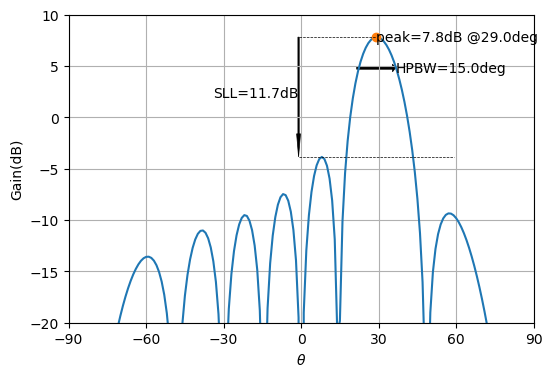

In [5]:
# this script calculate the pattern and related parameters for a uniform linear array of 8 elements with scan angle = 20
# using linear array class
from linear_array import LinearArray

num_elem = 8 # number of array elements
element_spacing = 0.5 # in wavelength
la = LinearArray(num_elem,element_spacing,scan_angle=30,element_pattern=True) #define the linear array geometry and excitation
la.calc_AF # calculate Array Factor (Array radiation pattern)
fig,ax = la.plot_pattern(annotate=True,xlab=r'$\theta$',ylab='Gain(dB)')
params = la.calc_peak_sll_hpbw()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))
fig.set_size_inches((6,4)),ax.set_xticks(range(-90,120,30));

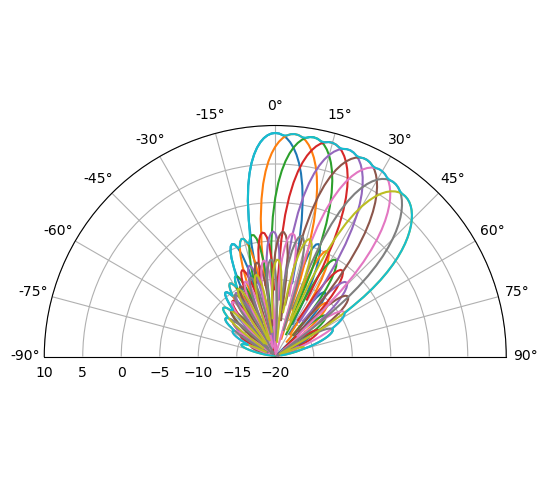

In [6]:
# calc_envelope method produces the scanned beam in the provided range where they can be plotted using
# polar_envelope or plot_envelope methods
la.calc_envelope(theta1=0,theta2=45,delta_theta=5)
la.polar_envelope();


Peak = 14.0dBi, theta_peak = 29.9deg, SLL = 8.8dB, HPBW = 1.8deg
Peak = 14.8dBi, theta_peak = -22.6deg, SLL = 0.6dB, HPBW = 1.5deg


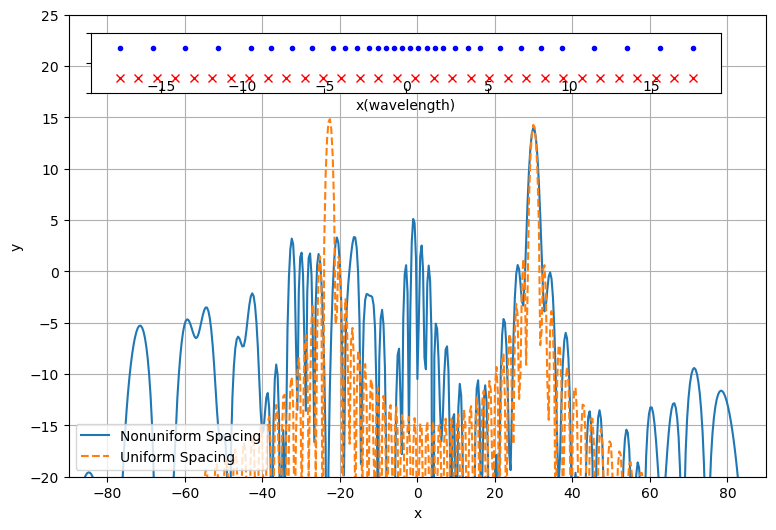

In [7]:
# Linear Array Class Example nonuniform spacing sparse array with low side lobe level
# The nonunifrom spacing removes the grating lobe
import numpy as np
import matplotlib.pyplot as plt
import random
from linear_array import LinearArray


num_elem = 32
dx = sorted(random.choices([0.5,0.75,1.25,2],k=int(num_elem/2),weights = [1, .75, 0.5, 0.5]))
element_spacing = np.hstack((np.flip(dx),dx[1:])) 
scan_angle = 30
la = LinearArray(num_elem,element_spacing,scan_angle=scan_angle)
la.calc_AF
ff = plt.figure(figsize=(9,6))
_,aa = la.plot_pattern(fig=ff,marker='-',xlim=(-90,90))
params = la.calc_peak_sll_hpbw()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))


element_spacing_uniform = np.mean(element_spacing)
la_uniform = LinearArray(num_elem,element_spacing_uniform,scan_angle=scan_angle)
la_uniform.calc_AF
la_uniform.plot_pattern(fig=ff,marker='--',xlim=(-90,90),ylim=(-20,25))
plt.legend(['Nonuniform Spacing','Uniform Spacing'],loc=3)
params = la_uniform.calc_peak_sll_hpbw()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))
## plotting the array geometry in the inset
ax_inset = ff.add_axes([0.15, 0.75, 0.7, 0.1])
ax_inset.plot(la.X,np.ones(la.X.shape),'.b')
ax_inset.plot(la_uniform.X,-np.ones(la_uniform.X.shape),'xr')
ax_inset.set_ylim(-2,2)
ax_inset.tick_params(axis="x",direction="in", pad=-10)
ax_inset.set_yticklabels('');
ax_inset.set_xlabel('x(wavelength)');

Peak = 12.3dBi, theta_peak = 0.0deg, SLL = 12.2dB, HPBW = 3.6deg


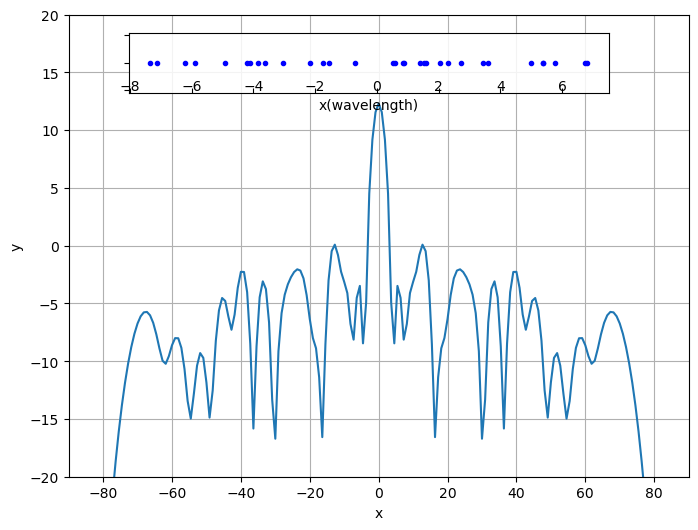

In [8]:
#%% Linear array example construct from element position
X = 4 * np.random.randn(num_elem)
la = LinearArray.from_element_position(X)
la.calc_AF
ff = plt.figure(figsize=(8,6))
_,aa = la.plot_pattern(fig=ff,marker='-',xlim=(-90,90),ylim=(-20,20))
params = la.calc_peak_sll_hpbw()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))
## plotting the array geometry in the inset
ax_inset = ff.add_axes([0.2, 0.75, 0.6, 0.1])
ax_inset.plot(la.X,np.zeros(la.X.shape),'.b')
ax_inset.patch.set_alpha(0.85)
ax_inset.set_yticklabels('');
ax_inset.tick_params(axis="x",direction="in", pad=-10)
ax_inset.set_yticklabels('');
ax_inset.set_xlabel('x(wavelength)');

# Amplitude Tapering
we can improve SLL (Side Lobe Level) by using amplitude tapering. We can use the antenna_array module **AF_calc_** method and directly pass the amplitude taper to the method.

                Peak   SLL  HPBW
boxcar          12.0  13.2   6.5
hamming         10.7  39.7   9.5
blackman         9.7  58.5  12.0
blackmanharris   9.0  89.3  13.5


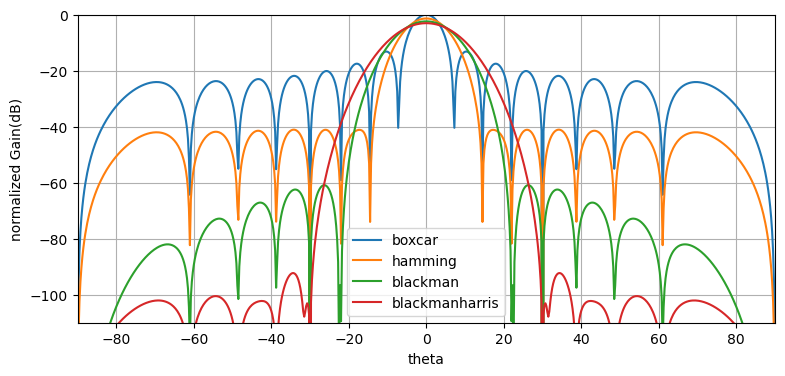

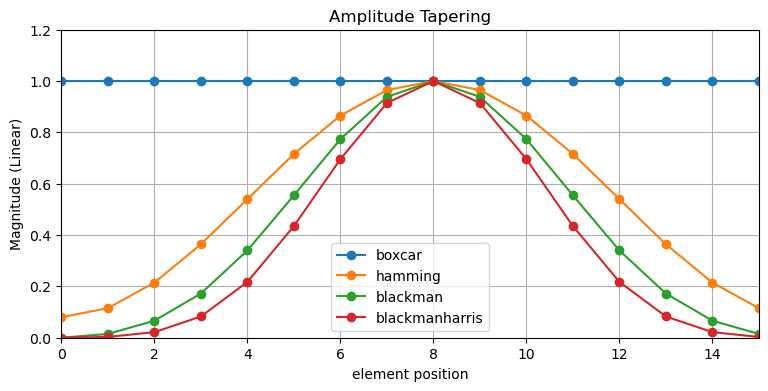

In [9]:
# An array of num_elem element with amplitude tapering / windowing to reduce side lobe level

from antenna_array import calc_AF_, plot_pattern ,calc_peak_sll_hpbw, db20

import pandas as pd
from scipy.signal.windows import get_window , taylor, chebwin

num_elem = 16
element_spacing = 0.5
scan_angle = 0
X = np.linspace(0,num_elem-1,num_elem) * element_spacing
P = -2 * np.pi * X * np.sin(np.radians(scan_angle))

Nt = 721 # length of theta vectoe
theta_deg,dtheta_deg = np.linspace(-90,90,Nt,retstep = True)
theta_deg = theta_deg.reshape(Nt,1)
fig, ax = plt.subplots(figsize=(9,4))
fig1, ax1 = plt.subplots(figsize=(9,4))

# based on window type
window_list = ['boxcar','hamming','blackman','blackmanharris']
df = pd.DataFrame(columns = ['Peak','SLL','HPBW'])
for window in window_list:
    I = get_window(window, num_elem)

    plt.sca(ax1) 
    plt.plot(I,'-o')

    AF_linear = calc_AF_(X,I,P,theta_deg,element_pattern=False)
    G = db20(AF_linear)
    plot_pattern(theta_deg,G-10*np.log10(num_elem),ylim=(-110,0),fig=fig,xlab='theta',ylab='normalized Gain(dB)')

    peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg)
    df.loc[window] = [peak, SLL, HPBW]


# plt.show()
plt.legend(window_list)
plt.sca(ax1) 
plt.legend(window_list)
ax1.set_xlabel('element position')
ax1.set_title('Amplitude Tapering')
ax1.set_ylabel('Magnitude (Linear)')
ax1.set_ylim(0,1.2)
ax1.set_xlim(0,num_elem-1)

plt.grid()
print(df.round(1))

### Apmlitude Tapering with SLL target
We can set the amplitude tapering to achieve a certain SLL value using some windowing functions that provide the taper profile based on the desired SLL. Below we have used **Taylor** and **Chebychef** window methods to realized SLL values from 20 to 100dB.

                Peak    SLL  HPBW
boxcar          12.0   13.2   6.5
hamming         10.7   39.7   9.5
blackman         9.7   58.5  12.0
blackmanharris   9.0   89.3  13.5
20              11.9   20.1   7.0
30              11.4   30.0   8.0
40              10.9   38.9   9.0
50              10.5   50.0  10.0
70               9.9   70.0  11.0
100              9.3  100.0  13.0


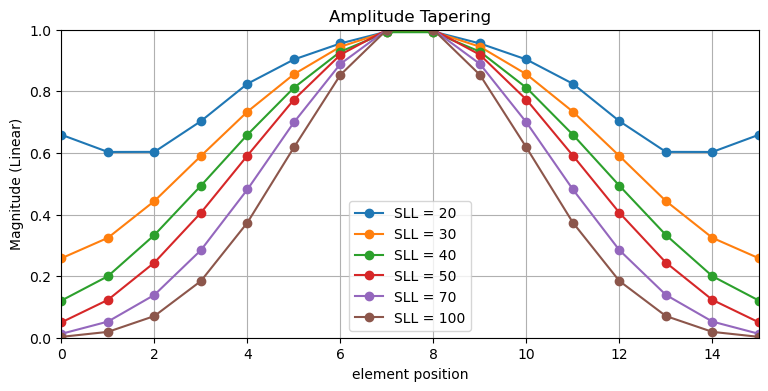

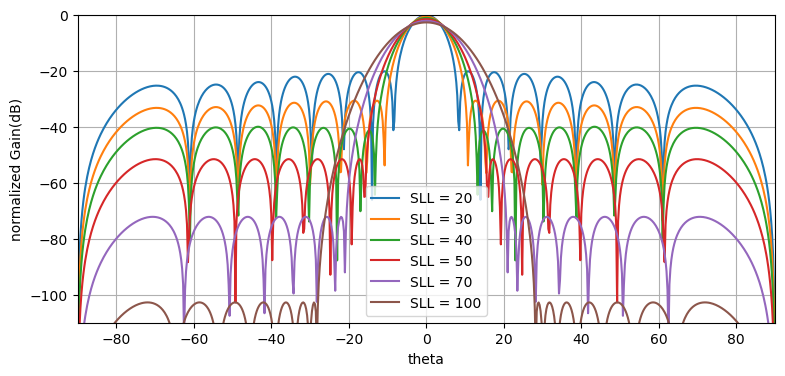

In [10]:
#Amlitude tapering based on SLL level

fig, ax = plt.subplots(figsize=(9,4))
fig1, ax1 = plt.subplots(figsize=(9,4))
SLL_list = [20,30,40,50,70,100]
for SLL_target in SLL_list:
    if SLL_target < 50:    
        I = taylor(num_elem, nbar=5, sll=SLL_target)
    else:
        I = chebwin(num_elem, SLL_target)
        
    plt.sca(ax1) 
    plt.plot(I,'-o')

    AF_linear = calc_AF_(X,I,P,theta_deg,element_pattern=False)
    G = db20(AF_linear)
    plot_pattern(theta_deg,G-10*np.log10(num_elem),ylim=(-110,0),fig=fig,xlab='theta',ylab='normalized Gain(dB)')

    peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg)
    df.loc[SLL_target] = [peak, SLL, HPBW]

print(df.round(1))
ax1.set_xlabel('element position')
ax1.set_title('Amplitude Tapering')
ax1.set_ylabel('Magnitude (Linear)')
ax1.set_ylim(0,1)
ax1.set_xlim(0,num_elem-1)
ax1.grid(True)
ax1.legend(['SLL = {}'.format(x) for x in SLL_list]);
ax.legend(['SLL = {}'.format(x) for x in SLL_list]);
ax.grid(True)


Peak = 10.3dBi, theta_peak = 0.0deg, SLL = 31.9dB, HPBW = 10.0deg
Peak = 10.3dBi, theta_peak = 0.0deg, SLL = 55.8dB, HPBW = 10.0deg


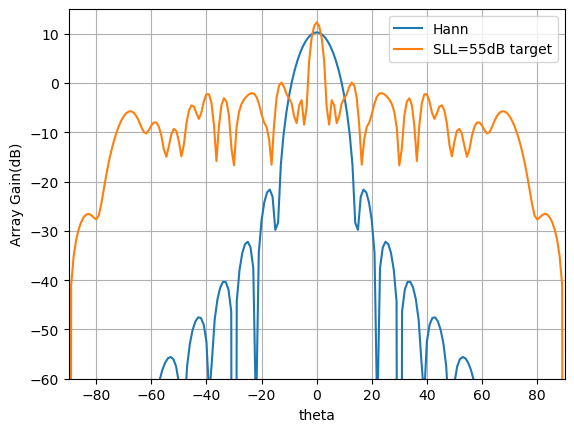

In [11]:
# Linear Array Class with amplitude tapering Example
# we can pass the window type or SLL target directly to our la object
# list of available winow 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html

from linear_array import LinearArray
num_elem = 16# number of elements
element_spacing = 0.5 
scan_angle = 0
la_hann = LinearArray(num_elem,element_spacing,scan_angle=scan_angle,window='hann')
la_hann.calc_AF
fig = plt.figure()
_,ax1 = la_hann.plot_pattern(fig=fig,marker='-',xlim=(-90,90),ylim=(-60,15))
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'
      .format(*la_hann.calc_peak_sll_hpbw()))
la_SLL_55 = LinearArray(num_elem,element_spacing,scan_angle=scan_angle,SLL=55)
la_SLL_55.calc_AF
_,ax2 = la.plot_pattern(fig=fig,marker='-',xlim=(-90,90),ylim=(-60,15),xlab='theta',ylab='Array Gain(dB)')
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'
      .format(*la_SLL_55.calc_peak_sll_hpbw()))

plt.legend(['Hann','SLL=55dB target']);

# Planar Array
The planar array class follows the same methods of the Linear Array class.

In particulare the class provides more felxibility to define regulre and non-regulare planar array shapes and visulaize the radiation patterns with a bundle of methods.
### Array input:
an _array_shape_ input variable determines the planar array shape <br>
Options:
-  array_shape = **['rect',(4,8),(0.5,0.6)]**: Rectanglure shape, with 4 row and 8 columns, spacing 0.5 and 0.6 wavelength, respectively.
- array_shape = **['tri',(4,8),(0.5,0.6)]**: Trianglure shape, with 4 row and 8 columns, spacing 0.5 and 0.6 wavelength, respectively.
- array_shape = **['circ',(0.6,1.5),(4,6)]**: circulare shape, radius 0.6 wl with 4 elements spaced equally on the circle, radius 1.5 with 6 elements spaced equally around the circle. 
- **calc_AF**: calculate array factor (AF) for a regulare equispaced linear antenna array



Directivity in dB rect:21.8, circ:21.5


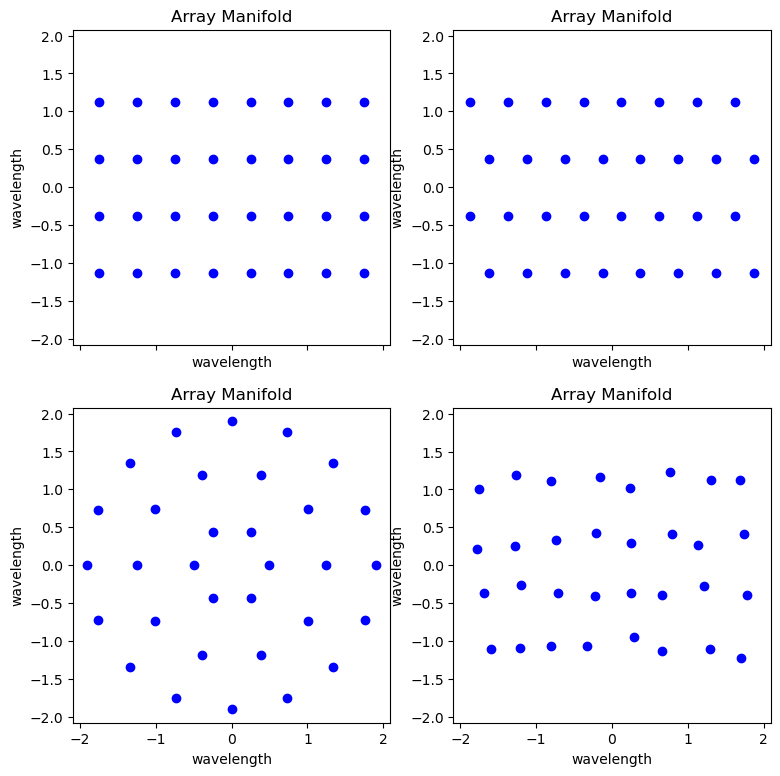

In [12]:
from planar_array import PlanarArray

fig,ax = plt.subplots(2,2,figsize=(9,9),sharex=True);

num_elem = (4,8)# number of row and col
element_spacing = (0.75,0.5)

array_shape = ['rect',num_elem,element_spacing]
pa_rect = PlanarArray(array_shape)
pa_rect.plot_array(fig=fig,ax=ax[0,0]);


array_shape = ['tri',num_elem,element_spacing]
pa_tri = PlanarArray(array_shape)
pa_tri.plot_array(fig=fig,ax=ax[0,1]);

aperture_rect = num_elem[0] * element_spacing[0] * num_elem[1] * element_spacing[1]
Directivity_rect = 10 * np.log10(4 * np.pi * aperture_rect)

num_elem = [6,10,16] 
radius = [0.5,1.25,1.9] 
array_shape = ['circ',num_elem,radius]
pa_circ = PlanarArray(array_shape)
pa_circ.plot_array(fig=fig,ax=ax[1,0]);
aperture_circ = np.pi * radius[-1]**2 
Directivity_circ = 10 * np.log10(4 * np.pi * aperture_circ)

X = pa_rect.X + 0.05 * np.random.randn(32)
Y = pa_rect.Y + 0.075 * np.random.randn(32)
array_shape = ['other',X,Y]
pa_rand = PlanarArray(array_shape)
pa_rand.plot_array(fig=fig,ax=ax[1,1]);
ax[0,1].set_aspect('equal')
ax[1,1].set_aspect('equal')
ax[1,0].set_aspect('equal')
ax[0,0].set_aspect('equal')
print(f'Directivity in dB rect:{Directivity_rect:1.1f}, circ:{Directivity_circ:1.1f}')

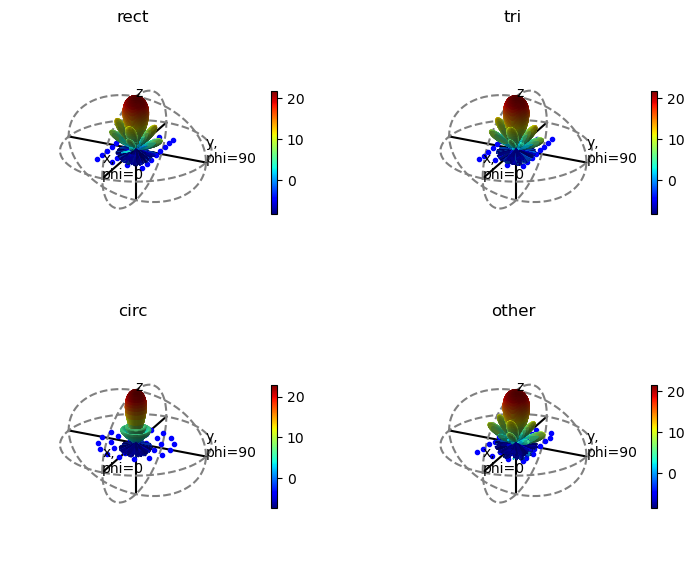

In [19]:
fig,ax = plt.subplots(2,2,figsize=(9,7),subplot_kw={'projection':'3d'});

for idx,pa in enumerate([pa_rect,pa_tri,pa_circ,pa_rand]):
    pa.calc_AF
    #%% polar3D
    pa.polar3D(g_range=30,fig=fig,ax=ax[int(idx/2),idx % 2],title=pa.shape)
#     fig1.set_size_inches((5,5))
#     theta_deg,G = pa.pattern_cut(scan_angle[1])
#     print(np.max(G))
#     pa.plot_pattern(fig=fig,ax=ax,xlim=[-90,90],xlab=r'$\theta$',ylab='dB',title='Radiation Pattern')

# plt.legend(['rect','tri','circ','rand']);

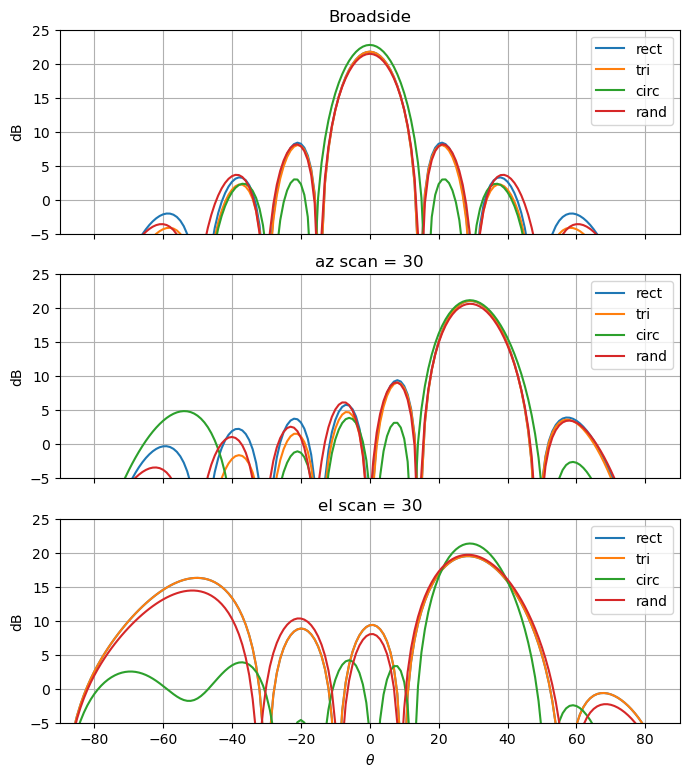

In [37]:
fig,ax = plt.subplots(3,1,figsize=(8,9),sharex=True);
for idx,pa in enumerate([pa_rect,pa_tri,pa_circ,pa_rand]):
    pa.scan_angle = (0,0)
    pa.calc_AF
    theta_deg,G = pa.pattern_cut(scan_angle[1])
    pa.plot_pattern(fig=fig,ax=ax[0],xlim=[-90,90],ylim=[-5,25],xlab='',ylab='dB',title='Broadside')
    plt.legend(['rect','tri','circ','rand']);
    
    pa.scan_angle = (30,0)
    pa.calc_AF
    theta_deg,G = pa.pattern_cut(scan_angle[1])
    pa.plot_pattern(fig=fig,ax=ax[1],xlim=[-90,90],ylim=[-5,25],xlab='',ylab='dB',title='az scan = 30')
    plt.legend(['rect','tri','circ','rand']);

    pa.scan_angle = (30,90)
    pa.calc_AF
    theta_deg,G = pa.pattern_cut(scan_angle[1])
    pa.plot_pattern(fig=fig,ax=ax[2],xlim=[-90,90],ylim=[-5,25],xlab=r'$\theta$',ylab='dB',title='el scan = 30')
    plt.legend(['rect','tri','circ','rand']);


pattern_params(Gain=20.6, Peak_Angle=29.0, SLL=12.0, HPBW=15.0)

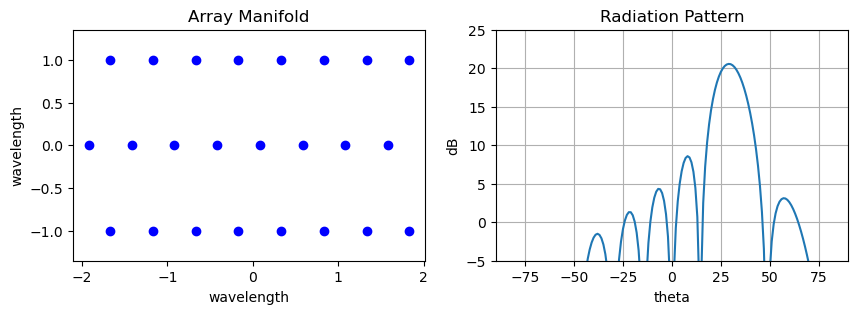

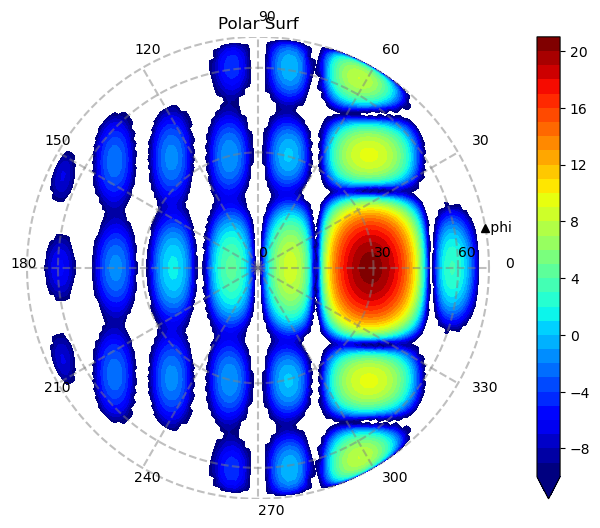

In [39]:
# planar array, closer look

from planar_array import PlanarArray
num_elem = (3,8)# number of row and col
element_spacing = (1,0.5) 
scan_angle = (30,0)
array_shape = ['tri',num_elem,element_spacing]
pa = PlanarArray(array_shape,scan_angle=scan_angle)
fig,ax = plt.subplots(1,2,figsize=(10,3))
pa.plot_array(fig=fig,ax=ax[0])

# pa.plot_array()
pa.calc_AF
theta_deg,G = pa.pattern_cut(scan_angle[1])
pa.plot_pattern(fig=fig,ax=ax[1],xlim=[-90,90],xlab='theta',ylab='dB',title='Radiation Pattern')
pa.calc_peak_sll_hpbw_calc()
pa.polarsurf(g_range=30);

pa.pattern_params


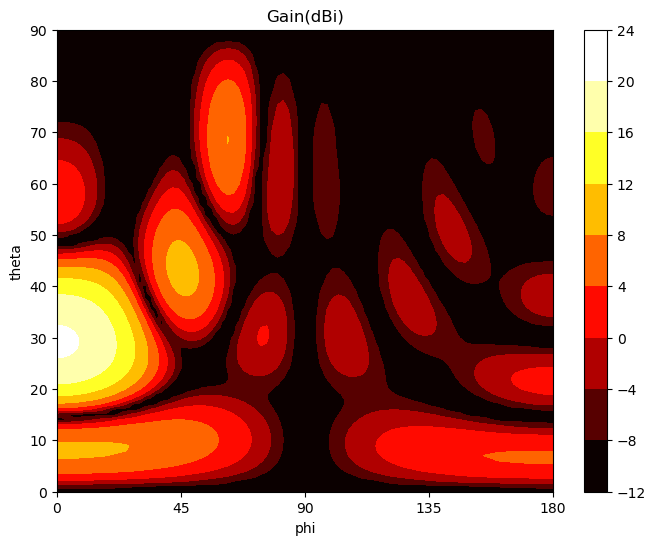

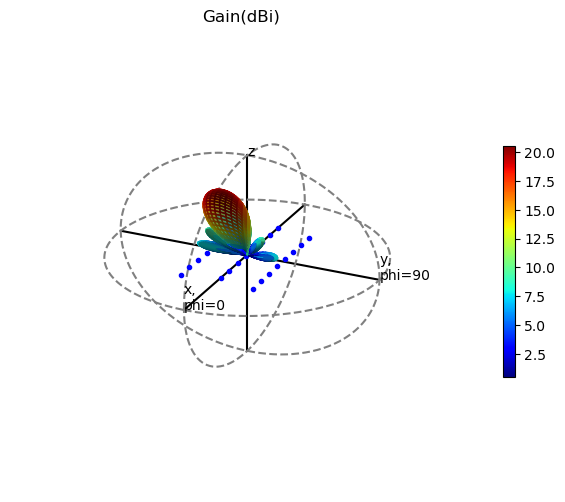

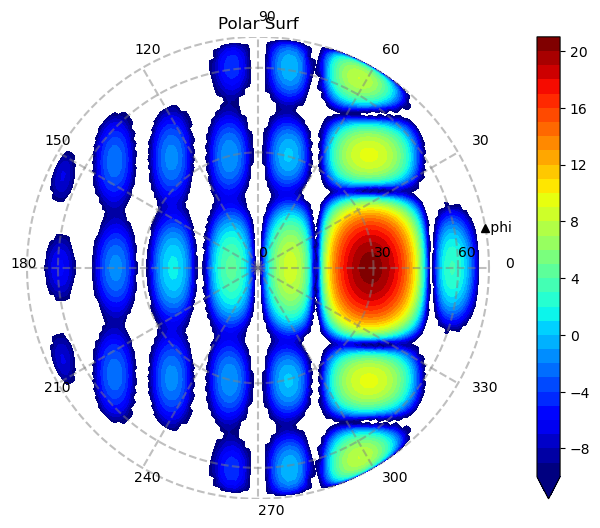

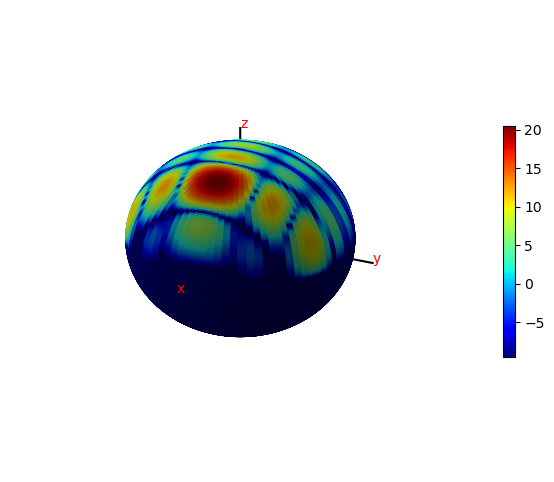

In [15]:
#%% Contour plot
fig1,ax1 = pa.pattern_contour(g_range=30,tlim=[0,90],plim=[0,180],title='Gain(dBi)');
ax1.set_xticks(np.linspace(0,180,5));

#%% polar3D
fig1,ax1 = pa.polar3D(g_range=20,title='Gain(dBi)')

#%% polarsurfnp.cos(np.pi/12),np.sin(np.pi/12)
pa.polarsurf(g_range=30);
#%% polarsphere
pa.polarsphere(g_range=40)

pattern_params(Gain=20.0, Peak_Angle=0.0, SLL=18.8, HPBW=12.0)


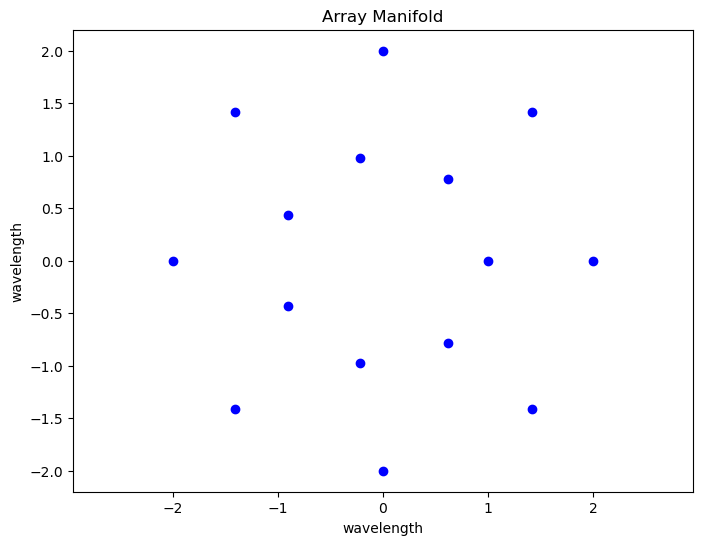

<Figure size 640x480 with 0 Axes>

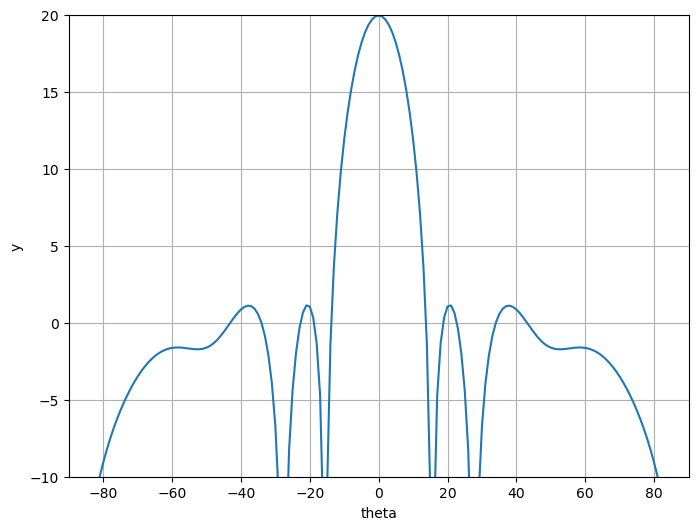

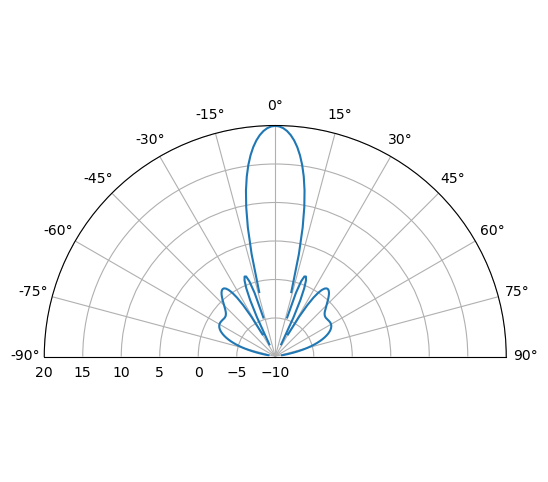

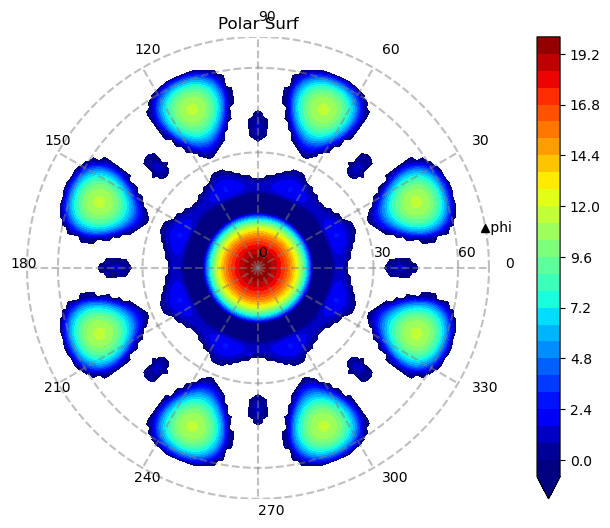

In [16]:
#%% circular array
num_elem = [7,8]# number of row and col
radius = [1,2] 
scan_angle = (0,0)
array_shape = ['circ',num_elem,radius]
pa = PlanarArray(array_shape,scan_angle=scan_angle)
pa.plot_array()
pa.calc_AF
theta_deg,G = pa.pattern_cut(scan_angle[1])
plt.figure()
pa.plot_pattern(xlim=[-90,90],xlab='theta')
pa.polar_pattern(rlim=[-10,20])
pa.calc_peak_sll_hpbw_calc()
print(pa.pattern_params)
pa.polarsurf(g_range=20);

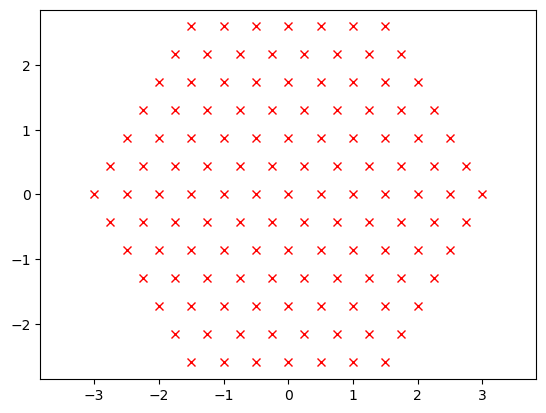

In [17]:
#%% hexagone shape array

Ls = 3
N = 7
X = np.linspace(0,Ls,N)
Y = np.zeros(X.shape)

dx = Ls / (N - 1)
X1 =  X.copy()
for n in range(N-1):
    X1 = X1[:-1] +   dx / 2
    X = np.hstack((X,X1))
    Y = np.hstack((Y, dx * np.sqrt(3) / 2 * (n+1) * np.ones(X1.shape)))


X_all = np.hstack((X[0],X[N:]))
Y_all = np.hstack((Y[0],Y[N:]))
for n in range(1,6): 
    Xr = X[N:] * np.cos(n * np.pi / 3) - Y[N:] * np.sin(n * np.pi / 3)
    Yr = X[N:] * np.sin(n * np.pi / 3) + Y[N:]* np.cos(n * np.pi / 3)
    # plt.plot(Xr,Yr,'o')
    X_all = np.hstack((X_all,Xr))
    Y_all = np.hstack((Y_all,Yr))


plt.plot(X_all,Y_all,'xr');
plt.axis('equal');

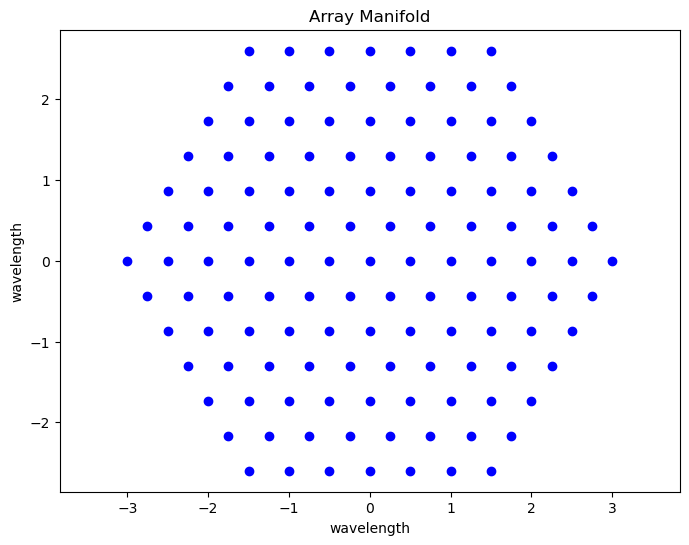

<Figure size 640x480 with 0 Axes>

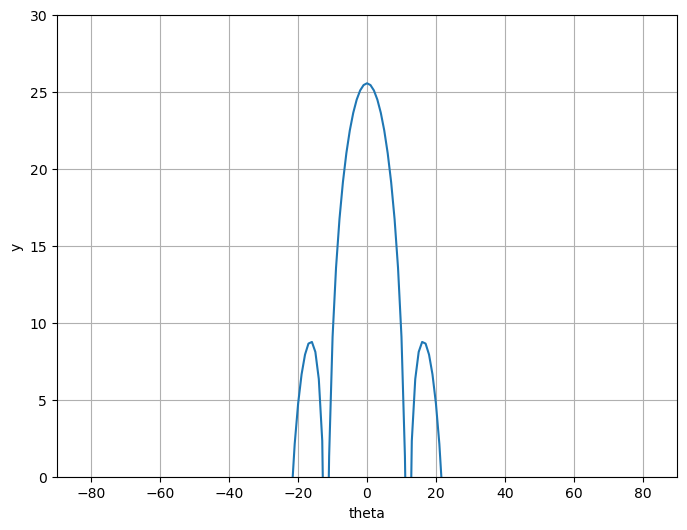

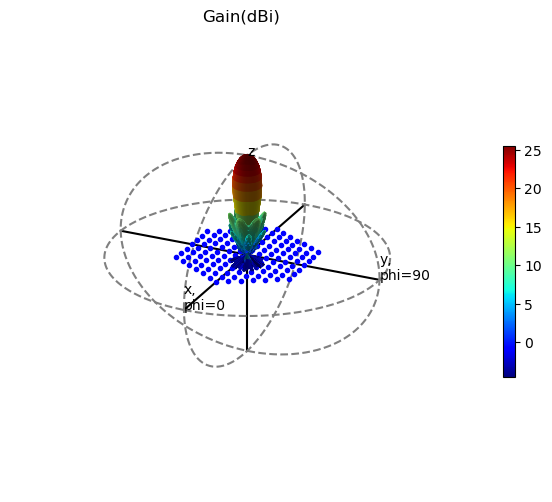

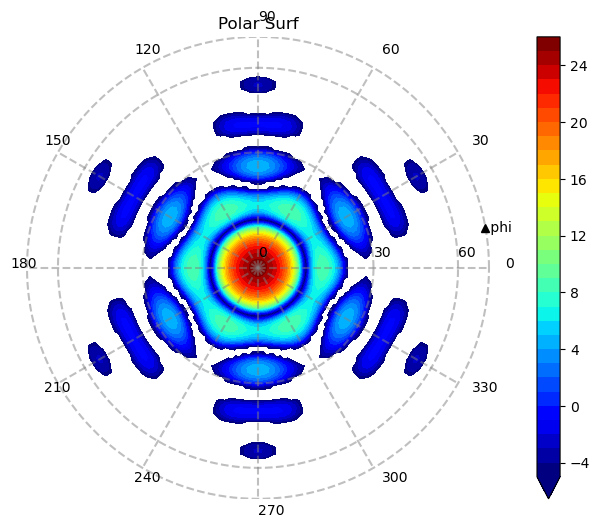

In [18]:
#%%
array_shape_rand = ['other',X_all,Y_all]
scan_angle = (0,0)
pa_Hex = PlanarArray(array_shape_rand,scan_angle=scan_angle)
fig,ax = pa_Hex.plot_array()
pa_Hex.calc_AF
plt.figure()
fig,ax = pa_Hex.plot_pattern(xlim=[-90,90],xlab='theta')

fig1,ax1 = pa_Hex.polar3D(g_range=30,title='Gain(dBi)')

pa_Hex.polarsurf(g_range=30);